In [2]:
import pandas as pd
import matplotlib.pyplot as plt

- Прочитайте csv файл (використовуйте функцію read_csv)

In [3]:
url_share = 'https://drive.google.com/file/d/128Z72FchbgROOr4fr5aZn_L6ja-mdDdf/view?usp=drive_link'
file_id = url_share.split('/')[-2]
url = f'https://drive.usercontent.google.com/download?id={file_id}&export=download&authuser=0'
data = pd.read_csv(url)

- Виведіть перші п'ять рядків (використовується функція head)

In [4]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


- Виведіть розміри датасету (використовуйте атрибут shape)

In [5]:
print('rows: ', data.shape[0])
print('columns: ', data.shape[1])

rows:  550
columns:  7


- Відповідь: Про скільки книг зберігає дані датасет?

In [6]:
# перевіримо на NA значення в колонці "Name"
count_NA = data['Name'].isnull().sum()
print(f'We have {count_NA} NA values in "Name"')

# варіант, якщо є впевненість, що назви книг не повторюються у різних авторів
count_books_1 = data['Name'].nunique()
print(f'Variant 1: Count of books is {count_books_1}')

# варіант, назва книги + автор = одна книга
new_df = data[['Name', 'Author']]
new_df = new_df.drop_duplicates()
count_books_2 = new_df.shape[0]
print(f'Variant 2: Count of books is {count_books_2}')

We have 0 NA values in "Name"
Variant 1: Count of books is 351
Variant 2: Count of books is 351


Для спрощення подальшої роботи давайте трохи підправимо назви змінних. Як бачите, тут усі назви починаються з великої літери, а одна - навіть містить пробіл. Це дуже небажано і може бути досить незручним. Давайте змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style). А заразом і вивчимо корисний атрибут датафрейму: columns (можна просто присвоїти список нових імен цьому атрибуту)

In [7]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
data.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# **Первинне дослідження даних**

- Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [8]:
print("Number of NaN:")
for i in data.items():
  print(f'column "{i[0]}": ', data[i[0]].isnull().sum())

Number of NaN:
column "name":  0
column "author":  0
column "user_rating":  0
column "reviews":  0
column "price":  0
column "year":  0
column "genre":  0


- Чи є в якихось змінних пропуски? (Так / ні)

Відповідь: ні

- Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [9]:
print(data['genre'].unique())

['Non Fiction' 'Fiction']


- Які є унікальні жанри?

Відповідь: on Fiction, Fiction

- Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

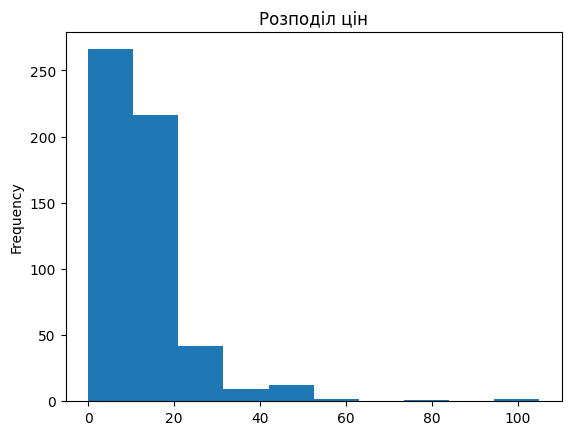

In [10]:
data['price'].plot(kind='hist', title='Розподіл цін')
plt.show()

- Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [11]:
price_max = data['price'].max()
print(f'Max price: {price_max}')

price_min = data['price'].min()
print(f'Min price: {price_min}')

price_avg = data['price'].mean()
print(f'AVG price: {price_avg}')

price_med = data['price'].median()
print(f'Median price: {price_med}')

Max price: 105
Min price: 0
AVG price: 13.1
Median price: 11.0


- Максимальна ціна?

Відповідь: 105

- Мінімальна ціна?

Відповідь: 0

- Середня ціна?

Відповідь: 13.1

- Медіанна ціна?

Відповідь: 11.0

# **Пошук та сортування даних**

- Який рейтинг у датасеті найвищий?

In [12]:
user_rating_max = data['user_rating'].max()
user_rating_max

4.9

Відповідь: 4.9

- Скільки книг мають такий рейтинг?

In [13]:
data_max_rate = data.query(f'user_rating == {user_rating_max}')
data_max_rate['name'].nunique()

28

Відповідь: 28

- Яка книга має найбільше відгуків?

In [14]:
reviews_max = data['reviews'].max()
data.query(f'reviews == {reviews_max}')

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Відповідь: Where the Crawdads Sing (author: Delia Owens)

- З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [15]:
data_year_2015 = data.query('year == 2015')
price_max_2015 = data_year_2015['price'].max()
data_year_2015.query(f'price == {price_max_2015}')

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


Відповідь: Publication Manual of the American Psychological Association, 6th Edition (author: American Psychological Association)

- Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)

In [16]:
data.query('genre == "Fiction" & year == 2010')['name'].nunique()

20

Відповідь: 20

- Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)

In [17]:
data.query('user_rating == 4.9 & (year == 2010 | year == 2011)')['name'].nunique()

1

Відповідь: 1

- І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values)

In [18]:
data_prices_2015 = data.query('price < 8 & year == 2015').sort_values(by=['price'])
data_prices_2015

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


- Яка книга остання у відсортованому списку?

In [19]:
data_prices_2015.tail(1)

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


Відповідь: Old School (Diary of a Wimpy Kid #10) (author: Jeff Kinney)

# **Агрегування даних та з'єднання таблиць**

- Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [20]:
data_genre = data[['price', 'genre']]
data_genre.groupby(['genre']).agg(['min', 'max'])

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

- Максимальна ціна для жанру Fiction:

Відповідь: 82

- Мінімальна ціна для жанру Fiction:

Відповідь: 0

- Максимальна ціна для жанру Non Fiction:

Відповідь: 105

- Мінімальна ціна для жанру Non Fiction:

Відповідь: 0

- Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [21]:
data_books = data[['name', 'author']]
# у автора може одна книга потрапити до рейтингу в декількох роках
data_books = data_books.groupby(['author']).agg(lambda x: x.nunique())
data_books

,name
author,
Abraham Verghese,1
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,2
William Davis,1
William P. Young,1


- Якої розмірності вийшла таблиця?

In [22]:
data_books.shape

(248, 1)

Відповідь: 248 рядків та 1 колонка (завдяки группуванню)

- Який автор має найбільше книг?

In [23]:
max_books = data_books['name'].max()
data_books.query(f'name == {max_books}')

,name
author,
Jeff Kinney,12


Відповідь: Jeff Kinney

- Скільки книг цього автора?

Відповідь: 12

- Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [24]:
# рейтинг відноситься до книги, тому прибираємо киги, які були в ТОП декілька разів
data_rate = data[['author', 'name', 'user_rating']].drop_duplicates()
data_rate = data_rate.groupby(['author']).agg('mean')
data_rate

<ipython-input-24-93d70d0f6e4a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_rate = data_rate.groupby(['author']).agg('mean')


,user_rating
author,
Abraham Verghese,4.60
Adam Gasiewski,4.40
Adam Mansbach,4.80
Adir Levy,4.80
Admiral William H. McRaven,4.70
...,...
Walter Isaacson,4.55
William Davis,4.40
William P. Young,4.60


- У якого автора середній рейтинг мінімальний?

In [25]:
author_rate_min = data_rate['user_rating'].min()
data_rate.query(f'user_rating == {author_rate_min}')

,user_rating
author,
Donna Tartt,3.9


Відповідь: Donna Tartt

- Який у цього автора середній рейтинг?

Відповідь: 3.9

- З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [26]:
data_concat = pd.concat([data_books, data_rate], axis=1)
data_concat

,name,user_rating
author,,
Abraham Verghese,1,4.60
Adam Gasiewski,1,4.40
Adam Mansbach,1,4.80
Adir Levy,1,4.80
Admiral William H. McRaven,1,4.70
...,...,...
Walter Isaacson,2,4.55
William Davis,1,4.40
William P. Young,1,4.60


- Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [27]:
data_concat = data_concat.sort_values(['name', 'user_rating'])
data_concat

,name,user_rating
author,,
Donna Tartt,1,3.900000
Gallup,1,4.000000
Gillian Flynn,1,4.000000
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
...,...,...
Bill O'Reilly,6,4.633333
Dav Pilkey,6,4.900000
Stephenie Meyer,7,4.657143


- Який автор перший у списку?

In [28]:
data_concat.head(1)

,name,user_rating
author,,
Donna Tartt,1,3.9


Відповідь: Donna Tartt

# **Візуалізація**

In [68]:
import seaborn as sns
import numpy as np

data.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


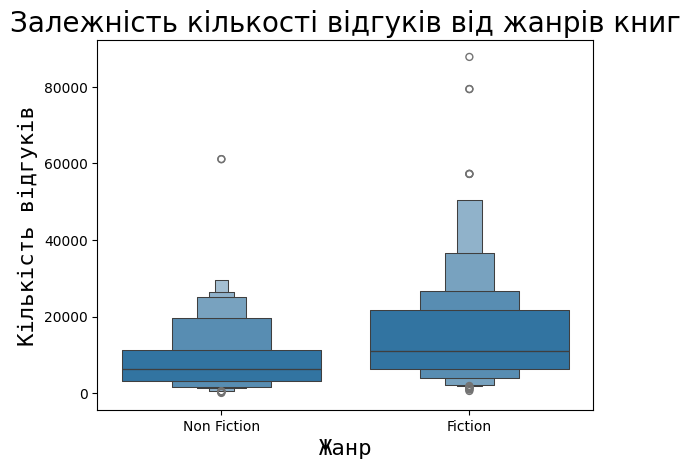

In [53]:
sns.boxenplot(x='genre', y='reviews', data=data)

plt.xlabel('Жанр', size=16, family='monospace')
plt.ylabel('Кількість відгуків', size=16, family='monospace')
plt.title('Залежність кількості відгуків від жанрів книг', size=20)

plt.show()

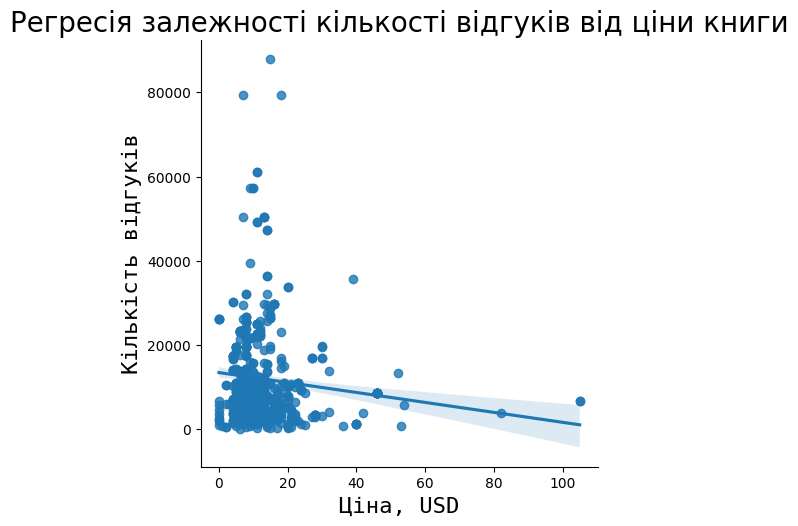

In [62]:
sns.lmplot(x='price', y='reviews', data=data)

plt.xlabel('Ціна, USD', size=16, family='monospace')
plt.ylabel('Кількість відгуків', size=16, family='monospace')
plt.title('Регресія залежності кількості відгуків від ціни книги', size=20)

plt.show()

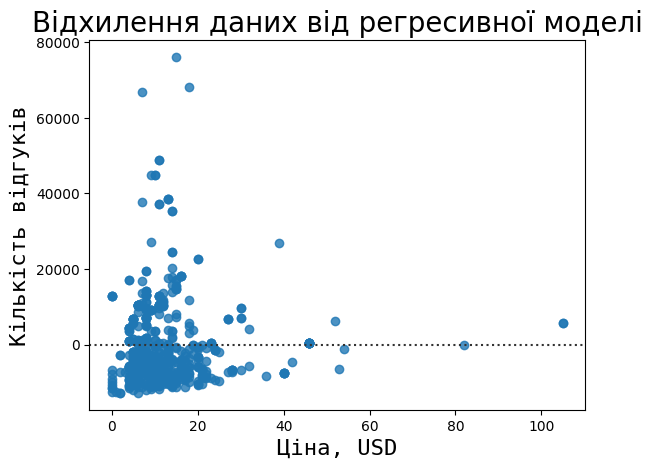

In [66]:
sns.residplot(x='price', y='reviews', data=data)

plt.xlabel('Ціна, USD', size=16, family='monospace')
plt.ylabel('Кількість відгуків', size=16, family='monospace')
plt.title('Відхилення даних від регресивної моделі', size=20)

plt.show()